In [2]:
import pandas as pd

data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# look at how many rows and columns
num_rows, num_cols = data.shape

print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  891
Number of columns:  12


In [5]:
# see how many missing values are there in each column

missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer

# age is a continuous variable, hence we use average imputation.
age_imputer = SimpleImputer(strategy='mean')
data['Age'] = age_imputer.fit_transform(data[['Age']])

# cabin and embarked are categorical variables, hence we use mode imputation instead of mean imputation.
cabin_imputer = SimpleImputer(strategy='most_frequent')
data['Cabin'] = cabin_imputer.fit_transform(data[['Cabin']]).ravel()

embarked_imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = embarked_imputer.fit_transform(data[['Embarked']]).ravel()

# checking for missing values.
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
# what is the distribution of passenger class?
passenger_class = data['Pclass'].value_counts()
print ('Passenger class distribution')
print(passenger_class)

Passenger class distribution
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [13]:
embarked_counts = data['Embarked'].value_counts()
print("Passengers embarked from each port:")
print(embarked_counts)

Passengers embarked from each port:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [16]:
survived_count = data['Survived'].sum()

print("Number of passengers who survived:", survived_count)

Number of passengers who survived: 342


In [21]:
survival_rate = data['Survived'].mean() * 100
print('Survival rate: {:.2f}%'.format(survival_rate))

Survival rate: 38.38%


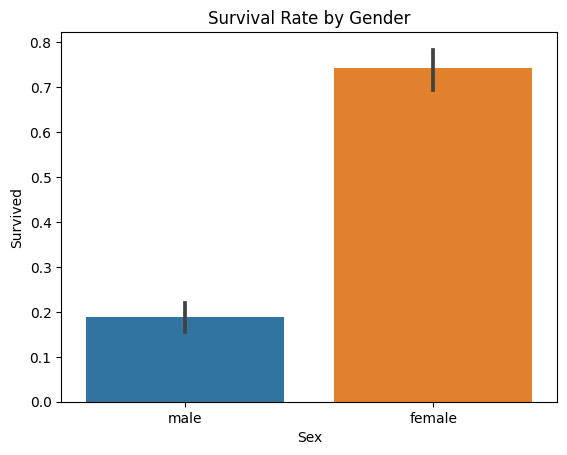

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot survival by gender
sns.barplot(x='Sex', y="Survived", data=data)
plt.title("Survival Rate by Gender")
plt.show()

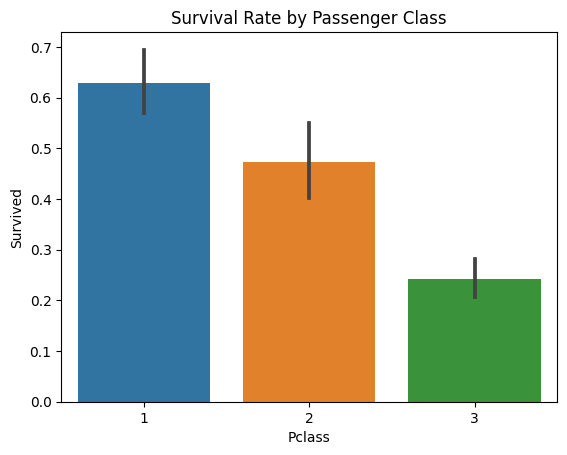

In [24]:
# plotting by survival class
sns.barplot(x="Pclass", y="Survived", data=data)
plt.title("Survival Rate by Passenger Class")
plt.show()

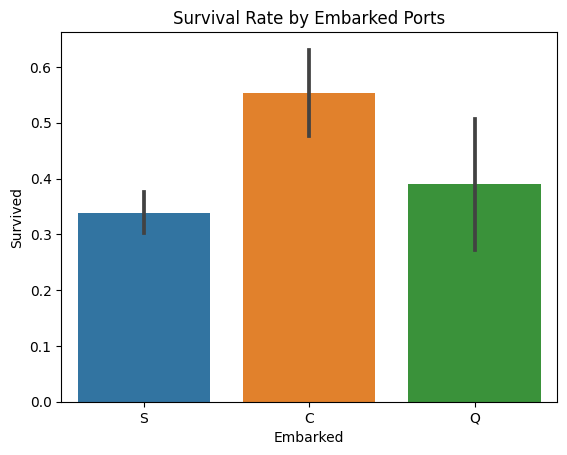

In [25]:
# plotting survival rate by embarked port

sns.barplot(x="Embarked", y="Survived", data=data)
plt.title("Survival Rate by Embarked Ports")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


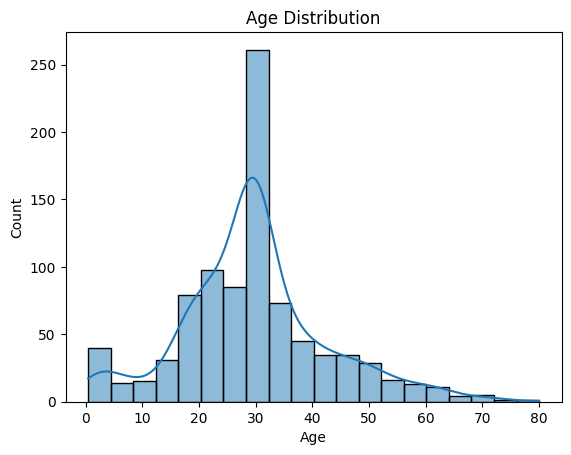

In [26]:
# plotting the age distribution
sns.histplot(data["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


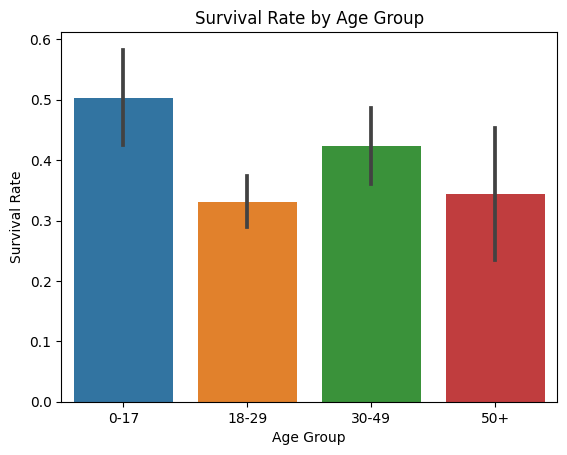

In [27]:
# creating age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 30, 50, data['Age'].max()], labels=['0-17', '18-29', '30-49', '50+'])

# plotting the survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=data)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()


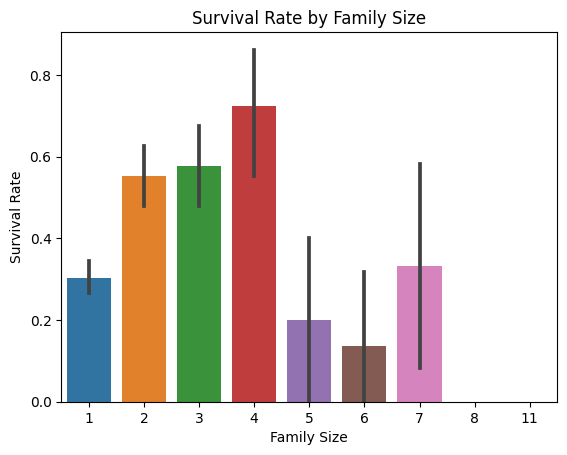

In [28]:
# calc family size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# plotting the survival rate by family size
sns.barplot(x="FamilySize", y="Survived", data=data)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()